# Diabetes Prediction Model

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [36]:
import seaborn as sns

# Data Preprocessing and Transformation

In [37]:
diabetes_data = pd.read_csv('C:/Users/Saurabh/OneDrive/Desktop/ai/diabetes.csv')

In [38]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [40]:
diabetes_data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [41]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Visualization

In [42]:
correlation_matrix = diabetes_data.corr()
print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

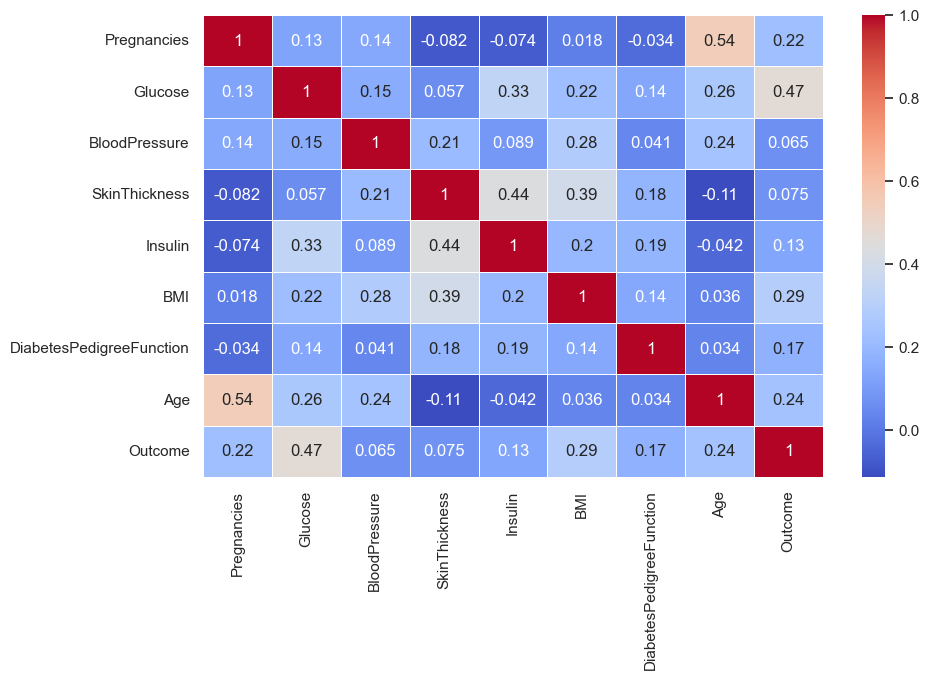

In [43]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [44]:
# The "Outcome" in this graph likely represents whether a person has diabetes (positive outcome) or does not (negative outcome).
# From this correlation heatmap, we can observe some insights regarding features associated with diabetes:
# Glucose shows a moderate positive correlation (0.47) with Outcome, suggesting that higher glucose levels are more likely associated with a positive diabetes diagnosis.
# BMI also has a positive correlation with Outcome (0.29), which may indicate that higher BMI could be a risk factor for diabetes.
# Age has a smaller but positive correlation (0.24) with Outcome, meaning older individuals may have a slightly increased likelihood of diabetes.

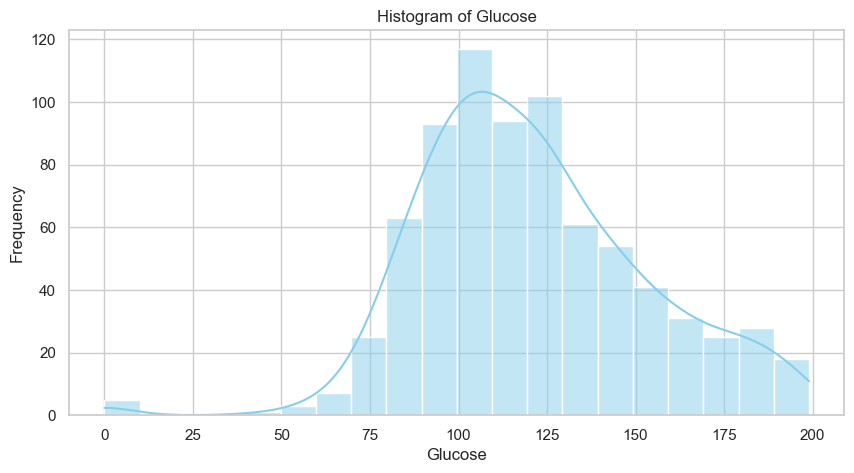

In [45]:
# Set the style of the plot
sns.set(style="whitegrid")

# Plot histogram for a single column (e.g., "Glucose")
plt.figure(figsize=(10, 5))
sns.histplot(diabetes_data['Glucose'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

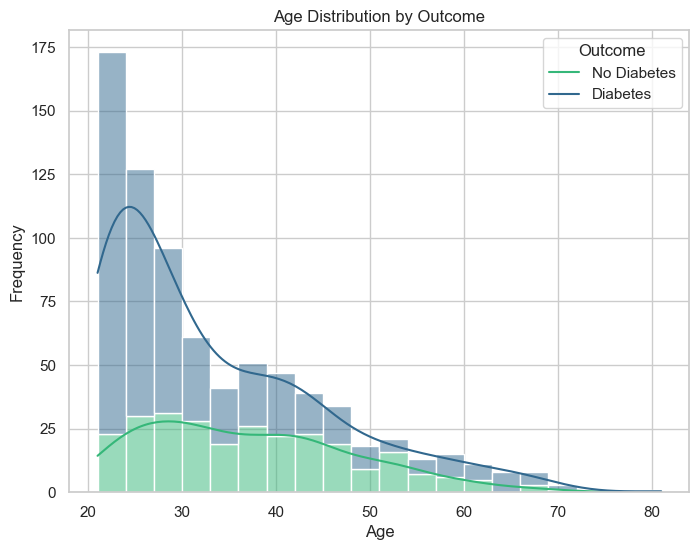

In [46]:
sns.set(style="whitegrid")

# Plot histogram for Age with Outcome as hue
plt.figure(figsize=(8, 6))
sns.histplot(data=diabetes_data, x="Age", hue="Outcome", bins=20, kde=True, multiple="stack", palette="viridis")
plt.title('Age Distribution by Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

In [47]:
# Increased Diabetes Risk with Age:

# If the histogram shows that older age groups (e.g., above 50) have a higher frequency of diabetes cases (where Outcome = 1), we can predict that age is a risk factor. This implies that as people age, they may be more likely to develop diabetes.
# Lower Risk in Younger Age Groups:

# If younger age groups (e.g., ages 20-30) have a lower frequency of diabetes cases, it suggests that younger individuals are at a lower risk. Thus, we can predict that people in these age groups are less likely to be diabetic compared to older age groups.
# Specific Age Range at Higher Risk:

# If the histogram reveals a peak in diabetes cases within a particular age range (e.g., ages 40-60), it suggests that people in this age group are at a higher risk. This could be useful for targeting preventive measures and early screening in this age group.
# Non-linear Relationship:

# If the histogram does not show a clear trend and diabetes cases are spread across various age groups, it indicates that age alone may not be a strong predictor. In such cases, other features (like Glucose or BMI) might be more predictive of diabetes than age.

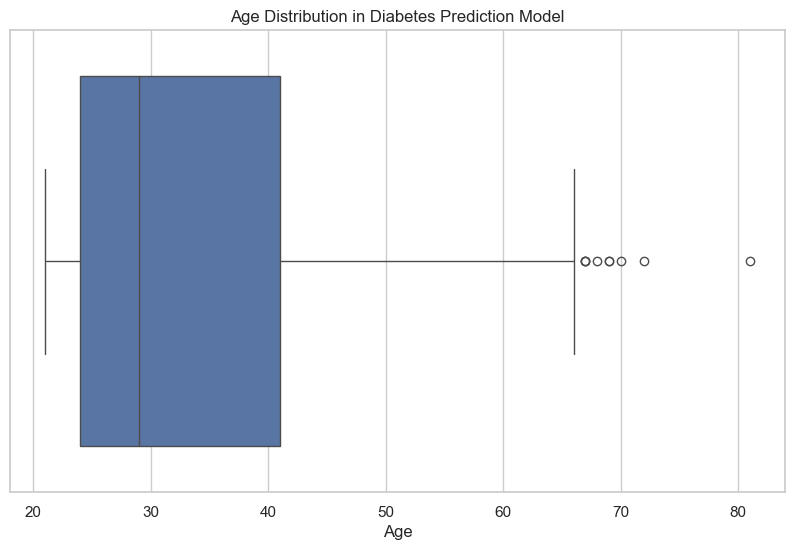

In [48]:
plt.figure(figsize=(10, 6))

# Create the boxplot for age
sns.boxplot(x=diabetes_data['Age'])

# Add title and labels
plt.title('Age Distribution in Diabetes Prediction Model')
plt.xlabel('Age')

# Show the plot
plt.show()

# Training Model

In [49]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [50]:
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [51]:
X = diabetes_data.drop(columns= 'Outcome',axis =1)
Y = diabetes_data['Outcome']

In [52]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [53]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X)

StandardScaler()

In [56]:
standardize_data = scaler.transform(X) 

In [57]:
print(standardize_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [58]:
X = standardize_data
Y = diabetes_data['Outcome']

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [60]:
    print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [61]:
classifier = svm.SVC(kernel='linear')

In [62]:

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Accuracy

In [63]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [64]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [65]:

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [66]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [67]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\Saurabh\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
